# D208 Performance Assessment Task 1
## Darian Gurrola
## Course Instructor: Dr. Keiona Middleton

## A1.

As consumers use more digital applications such as video streaming and online gaming, the demand for internet bandwidth has steadily increased over the last several years (Lee, 2023).  In this analysis, we will explore the question, "Which variables are most responsible in predicting customer bandwidth usage?".  The responding variable being examined is "Bandwidth_GB_Year".  The explanatory variables below will be reviewed and used to develop a multiple linear regression model. 

<ul>
    <li>Population</li>
    <li>Area</li>
    <li>Children</li>
    <li>Age</li>
    <li>Income</li>
    <li>Contract</li>
    <li>Port_modem</li>
    <li>Outage_sec_perweek</li>
    <li>OnlineBackup</li>
    <li>StreamingTV</li>
    <li>StreamingMovies</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
</ul>

## A2.  

The goal of this analysis is to determine which factors have the greatest influence on "Bandwidth_GB_Year".  The telecommunications provider will use the findings from this analysis to develop new pricing models and packages to customers who are likely to use more bandwidth.

## B1.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Linear regression is one of the most useful tools for understanding the relationship between multiple explanatory variables and a response variable.  This model, however, requires several assumptions in order to be truly effective.  These four assumptions are a linear relationship between independent and dependent variables, independence of residuals, homoscedasticity, and normality of residuals (Statology, 2020).  If these assumptions are not met, it could have a negative effect on accuracy of the model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First, this model assumes that there is a linear relationship between between the explanatory variables and the responding variable.  This means that an increase in the responding variable can be directly attributed to an increase in the explanatory variables.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Independence of residuals is another key assumption.  This means that there is no relationship between residuals in a given dataset.  A lack of independent residuals can cause autocorrelation, which can result in misleading conclusions from a regression analysis. Linear regression also assumes homoscedasticity.  This means that there is a uniform spread of residuals regardless of changes in the explanatory variables.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, linear regression assumes normality of residuals.  This means that if the values of residuals were plotted on a histogram, they would form a normal distribution with a standard bell curve.  

## B2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this analysis, I will be using Python to perform multiple linear regression. Python is one of the most popular tools for predictive modeling and machine learning.  One of the benefits of this language is the wide variety of libraries.  I plan on using several libraries throughout the different phases of the analysis.  Pandas will be used to import and manipulate data from the "churn_clean" csv file.  Numpy will be used to perform statistical calculations.  Seaborn and Matplotlib will be used to generate visualizations for each of the variables. Statsmodels will be used to develop the linear regression model. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another benefit of python is its speed.  Although R has the advantage of being specialized towards data science, Python is able to render data at a much faster speed (Turing).  This should prove very useful when performing the complex calculations required for linear regression. 

## B3.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Multiple linear regression is the appropriate technique for this analysis because it can be used to determine how strong the relationship between explanatory and a continuous dependent variables is  (Walwadkar, 2022).  This method is effective because the dependent variable, "Bandwidth_GB_Year", is continuous.  Multiple linear regression will allow us to use a variety of continuous and categorical variables to make predictions.

## C1.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Before performing the regression analysis, the data must be sufficiently cleaned.  This process will involve the detection treatment of duplicates, missing values, and outliers, as well as the re-expression of categorical variables.  The churn data has been imported into a python variable named "df_churn".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first part of the data cleaning process is to detect duplicates, missing values, and outliers.  To identify duplicates in "df_churn", I combined the "duplicated()" and "value_counts()” methods from the pandas library.  The resulting output indicated that there were no duplicate rows found in the dataset.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To detect missing values, I used the "isnull()" function from pandas, along with the "sum()" function on "df_churn".  The output shows that there were 2,129 missing values in the InternetService variable.  Lastly, I detected outliers by generating boxplots for each quantitative variable.  This was done using the "boxplot()" function from the seaborn library.   The resulting output showed that there were outliers in "Population", "Children", "Income", "Outage_sec_perweek", "Email", "Contacts", and "Yearly_equip_failure".  To supplement the boxplots, I created a function called "boxplot_info()".  This function accepts a variable from df_churn as an input and provides a detailed output of boxplot and outlier information.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step in the data cleaning process is to treat the data quality issues mentioned previously.  Duplicates do not need to be treated because they are not present in the dataset. To treat the missing values in "InternetService" I used the "fillna()" method and imputed missing values with the mode.  This was done because "InternetService" is a categorical variable.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After reviewing the boxplots for each numerical variable, I chose to retain all outliers.  This was because the values were plausible and not egregious enough to exclude.  I also did not want to reduce the sample size or potentially introduce bias into the dataset.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Please see the annotated below, which was used to detect and treat data quality issues.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_churn = pd.read_csv('churn_clean.csv')

In [8]:
#Detect duplicate rows in df_churn 
print(df_churn.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [9]:
#Detect missing values in df_churn
df_churn.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [10]:
#Create function to provide boxplot information
def boxplot_info(input):

    #obtain values of column and ignore nulls 
    data = input.dropna().values
    
    #generate q1 and q3 using pandas.DataFrame.quantile.  
    q1 = input.quantile(0.25)
    print("Q1: " + str(q1))
    q3 = input.quantile(0.75)
    print("Q3: " + str(q3))
    
    #Calculate interquartile range for boxplot by subtracting Q1 from Q3
    iqr = q3 - q1
    print("IQR: " + str(iqr))
    
    #Calculate whisker values of boxplot. 
    whisker_lower = q1 - (1.5 * iqr)
    print("Lower Whisker: " + str(whisker_lower))
    whisker_upper = q3 + (1.5 * iqr)
    print("Upper Whisker: " + str(whisker_upper))
    
     #Find number of outliers outside of Q1 and Q3.  Print total number of outliers in column.  
    outliers_min = (input < whisker_lower).sum()
    print("Number of outliers lower than boxplot minimum: " + str(outliers_min))
    outliers_max = (input > whisker_upper).sum()
    print("Number of outliers greater than boxplot maximum: " + str(outliers_max))
    outliers_total = outliers_min + outliers_max
    print("Total number of Outliers: " + str(outliers_total))
    max_outlier = max(data)
    print("Highest Outlier: " + str(max_outlier))
    min_outlier = min(data)
    print("Lowest Outlier: " + str(min_outlier))

Q1: 738.0
Q3: 13168.0
IQR: 12430.0
Lower Whisker: -17907.0
Upper Whisker: 31813.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 937
Total number of Outliers: 937
Highest Outlier: 111850
Lowest Outlier: 0


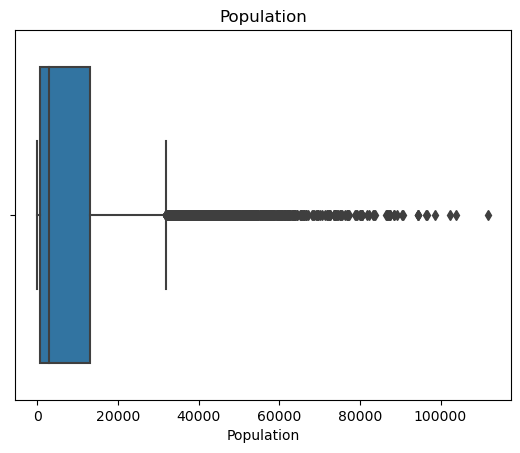

In [11]:
#Detect outliers in Population variable
population_boxplot = sns.boxplot(x="Population", data = df_churn).set_title("Population")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Population'])

Q1: 0.0
Q3: 3.0
IQR: 3.0
Lower Whisker: -4.5
Upper Whisker: 7.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 401
Total number of Outliers: 401
Highest Outlier: 10
Lowest Outlier: 0


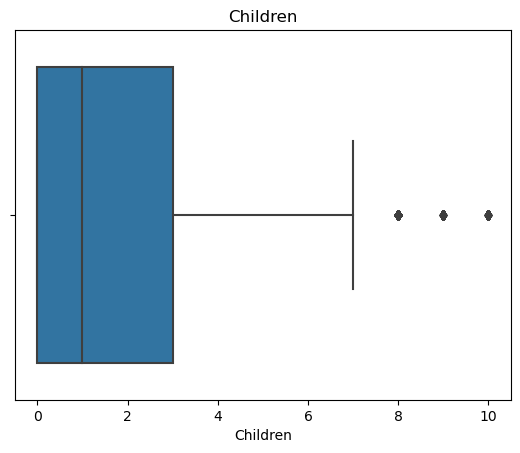

In [12]:
#Detect outliers in Children variable
population_boxplot = sns.boxplot(x="Children", data = df_churn).set_title("Children")

#Generate boxplot info for Children using boxplot_info function
boxplot_info(df_churn['Children'])

Q1: 35.0
Q3: 71.0
IQR: 36.0
Lower Whisker: -19.0
Upper Whisker: 125.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 89
Lowest Outlier: 18


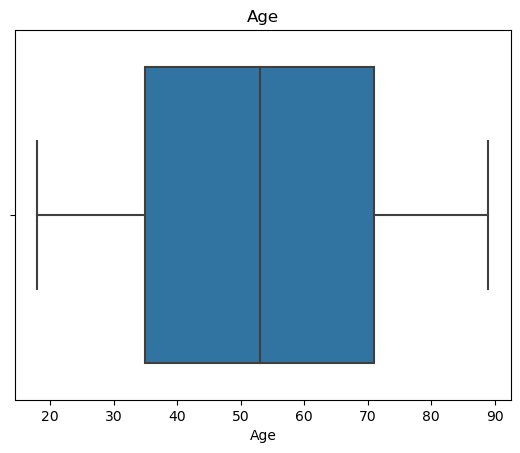

In [13]:
#Detect outliers in Age variable
population_boxplot = sns.boxplot(x="Age", data = df_churn).set_title("Age")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Age'])

Q1: 19224.7175
Q3: 53246.17
IQR: 34021.4525
Lower Whisker: -31807.46125
Upper Whisker: 104278.34875
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 336
Total number of Outliers: 336
Highest Outlier: 258900.7
Lowest Outlier: 348.67


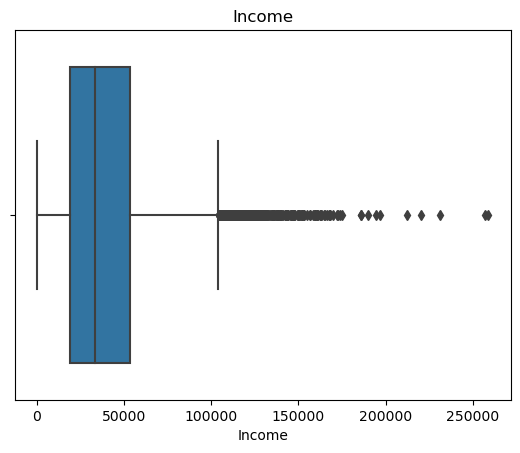

In [14]:
#Generate boxplot for Income variable
income_boxplot = sns.boxplot(x="Income", data = df_churn).set_title("Income")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Income'])

Q1: 8.018214
Q3: 11.969485
IQR: 3.951271
Lower Whisker: 2.0913075
Upper Whisker: 17.8963915
Number of outliers lower than boxplot minimum: 33
Number of outliers greater than boxplot maximum: 43
Total number of Outliers: 76
Highest Outlier: 21.20723
Lowest Outlier: 0.09974694


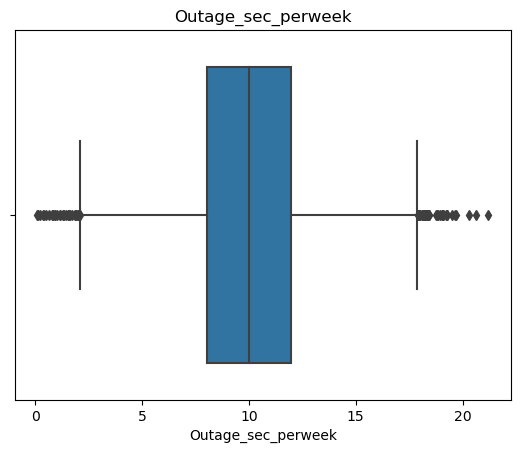

In [15]:
#Generate boxplot for Outage_sec_perweek variable
outage_boxplot = sns.boxplot(x="Outage_sec_perweek", data = df_churn).set_title("Outage_sec_perweek")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Outage_sec_perweek'])

Q1: 10.0
Q3: 14.0
IQR: 4.0
Lower Whisker: 4.0
Upper Whisker: 20.0
Number of outliers lower than boxplot minimum: 23
Number of outliers greater than boxplot maximum: 15
Total number of Outliers: 38
Highest Outlier: 23
Lowest Outlier: 1


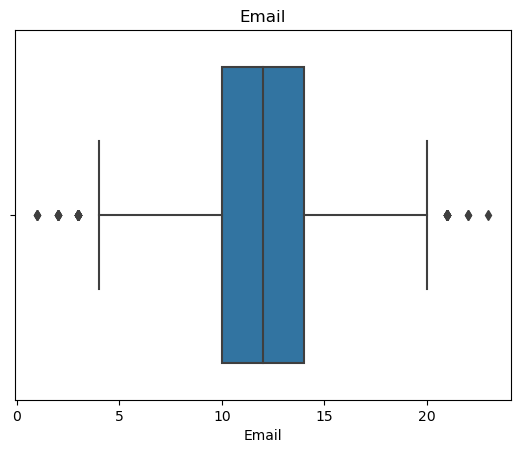

In [16]:
#Generate boxplot for Email variable
email_boxplot = sns.boxplot(x="Email", data = df_churn).set_title("Email")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Email'])

Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Whisker: -3.0
Upper Whisker: 5.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 8
Total number of Outliers: 8
Highest Outlier: 7
Lowest Outlier: 0


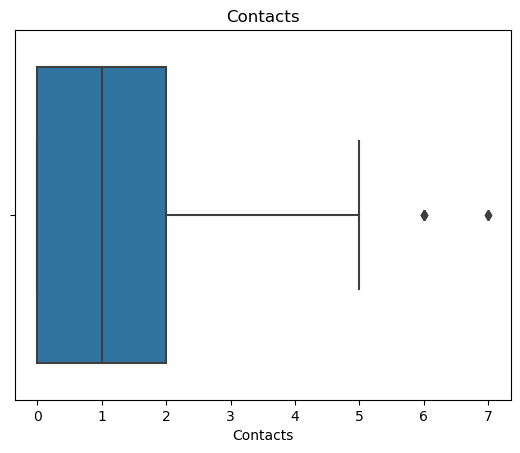

In [17]:
#Generate boxplot for Contacts variable
Contacts_boxplot = sns.boxplot(x="Contacts", data = df_churn).set_title("Contacts")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Contacts'])

Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 94
Total number of Outliers: 94
Highest Outlier: 6
Lowest Outlier: 0


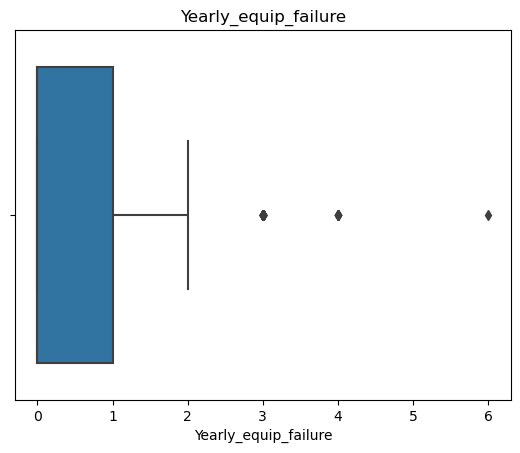

In [18]:
#Generate boxplot for Yearly_equip_failure variable
failure_boxplot = sns.boxplot(x="Yearly_equip_failure", data = df_churn).set_title("Yearly_equip_failure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Yearly_equip_failure'])

Q1: 7.91769359175
Q3: 61.479795
IQR: 53.56210140825
Lower Whisker: -72.42545852062501
Upper Whisker: 141.822947112375
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 71.99928
Lowest Outlier: 1.00025934


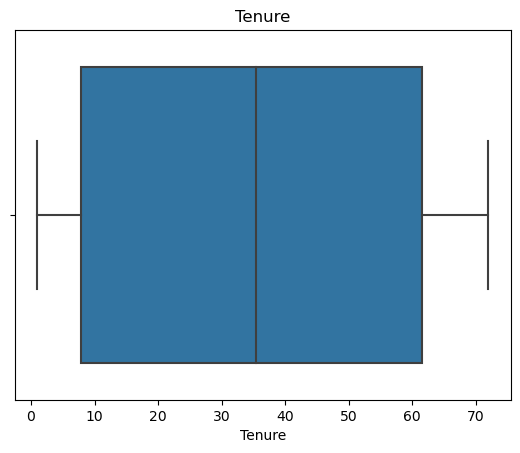

In [19]:
#Generate boxplot for Tenure variable
tenure_boxplot = sns.boxplot(x="Tenure", data = df_churn).set_title("Tenure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Tenure'])

Q1: 139.979239
Q3: 200.734725
IQR: 60.75548599999999
Lower Whisker: 48.84601000000002
Upper Whisker: 291.867954
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 290.160419
Lowest Outlier: 79.97886


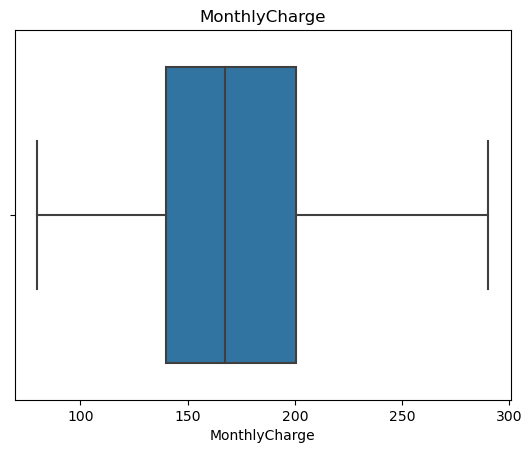

In [20]:
#Generate boxplot for MonthlyCharge variable
MonthlyCharge_boxplot = sns.boxplot(x="MonthlyCharge", data = df_churn).set_title("MonthlyCharge")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['MonthlyCharge'])

Q1: 1236.470827
Q3: 5586.1413695
IQR: 4349.6705425
Lower Whisker: -5288.03498675
Upper Whisker: 12110.64718325
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 7158.98153
Lowest Outlier: 155.5067148


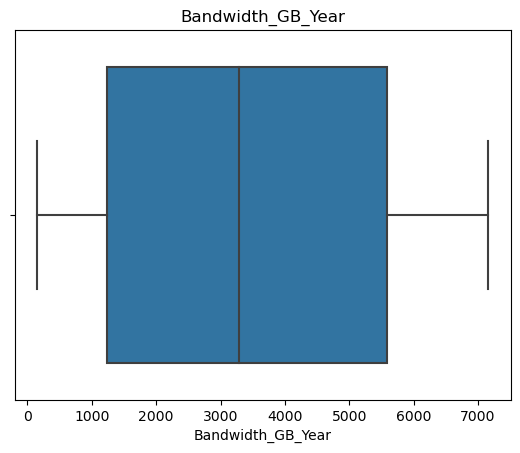

In [21]:
#Generate boxplot for Bandwidth_GB_Year variable
bandwidth_boxplot = sns.boxplot(x="Bandwidth_GB_Year", data = df_churn).set_title("Bandwidth_GB_Year")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Bandwidth_GB_Year'])

In [22]:
#Treat missing values in InternetService with mode imputation
df_churn['InternetService'] = df_churn['InternetService'].fillna(df_churn['InternetService'].mode()[0])

## C2. 

Please see the summary statistics for the dependent and independent variables below.  For the numerical variables, I used the "describe()" method to obtain basic information such as the mean and standard deviation.  For the categorical variables, I used the "value_counts()" method and multiplied by 100 to obtain percentages for each category.  

In [24]:
#Describe dependent variable, Bandwidth_GB_Year
df_churn['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [25]:
#Describe independent variable, Population
df_churn['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [26]:
#Describe independent variable, Children
df_churn['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [27]:
#Describe independent variable, Age
df_churn['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [28]:
#Describe independent variable, Income
df_churn['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [29]:
#Describe independent variable, Outage_sec_perweek
df_churn['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [30]:
#Describe independent variable, MonthlyCharge
df_churn['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [31]:
#Describe independent variable, Area
df_churn['Area'].value_counts(normalize=True)*100

Area
Suburban    33.46
Urban       33.27
Rural       33.27
Name: proportion, dtype: float64

In [32]:
#Describe independent variable, Contract
df_churn['Contract'].value_counts(normalize = True)*100

Contract
Month-to-month    54.56
Two Year          24.42
One year          21.02
Name: proportion, dtype: float64

In [33]:
#Describe independent variable, Port_modem
df_churn['Port_modem'].value_counts(normalize=True)*100

Port_modem
No     51.66
Yes    48.34
Name: proportion, dtype: float64

In [34]:
#Describe independent variable, OnlineBackup
df_churn['OnlineBackup'].value_counts(normalize=True)*100

OnlineBackup
No     54.94
Yes    45.06
Name: proportion, dtype: float64

In [35]:
#Describe independent variable, StreamingTV
df_churn['StreamingTV'].value_counts(normalize=True)*100

StreamingTV
No     50.71
Yes    49.29
Name: proportion, dtype: float64

In [36]:
#Describe independent variable, StreamingMovies
df_churn['StreamingMovies'].value_counts(normalize=True)*100

StreamingMovies
No     51.1
Yes    48.9
Name: proportion, dtype: float64

## C3.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Please see univariate and bivariate visualizations of dependent and independent variables below. The dependent variable "Bandwidth_GB_Year" is included in all bivariate visualizations. 

Text(0.5, 1.0, 'Bandwidth_GB_Year - Dependent Variable')

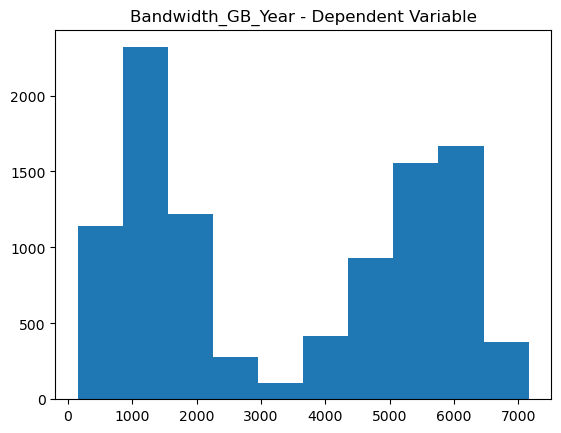

In [38]:
#Univariate distribution of dependent variable, Bandwidth_GB_Year
plt.hist(df_churn['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year - Dependent Variable')

Text(0.5, 1.0, 'Population - independent Variable')

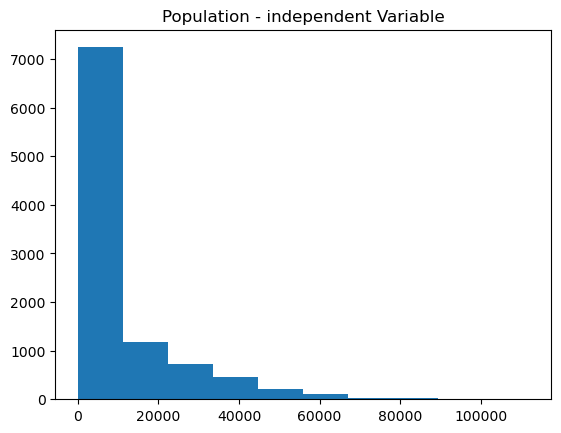

In [39]:
#Univariate distribution of dependent variable, Population
plt.hist(df_churn['Population'])
plt.title('Population - independent Variable')

<Axes: xlabel='Population', ylabel='Bandwidth_GB_Year'>

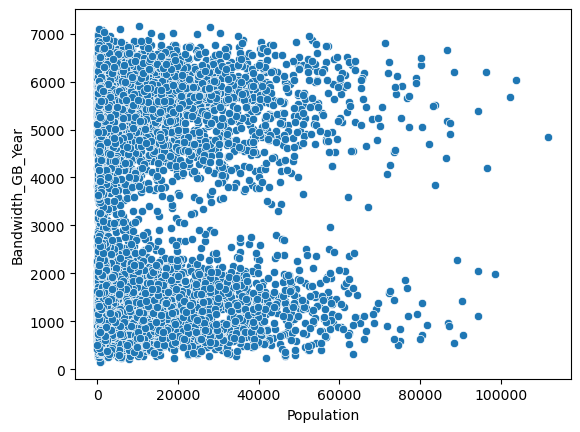

In [40]:
#Bivariate distribution of Population and Bandwidth_GB_Year
sns.scatterplot(x="Population", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Children - independent Variable')

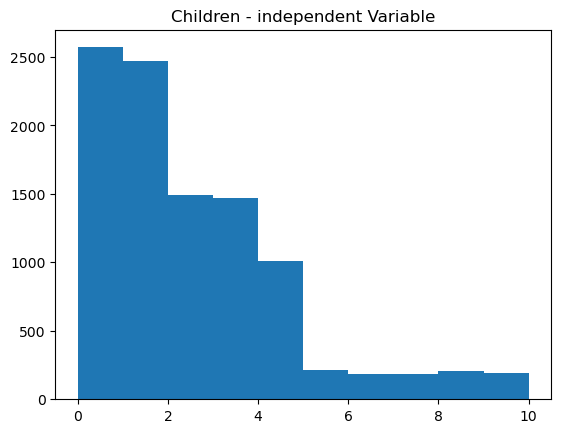

In [41]:
#Univariate distribution of dependent variable, Income
plt.hist(df_churn['Children'])
plt.title('Children - independent Variable')

<Axes: xlabel='Children', ylabel='Bandwidth_GB_Year'>

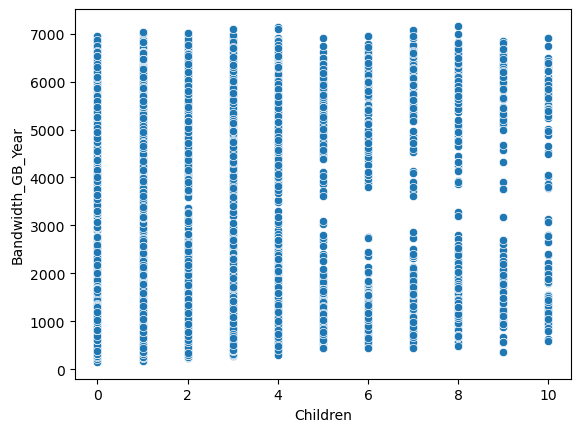

In [42]:
#Bivariate distribution of Children and Bandwidth_GB_Year
sns.scatterplot(x="Children", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Age - independent Variable')

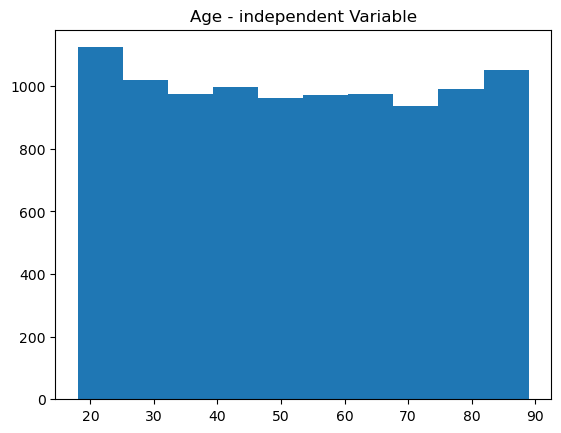

In [43]:
#Univariate distribution of dependent variable, Age
plt.hist(df_churn['Age'])
plt.title('Age - independent Variable')

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

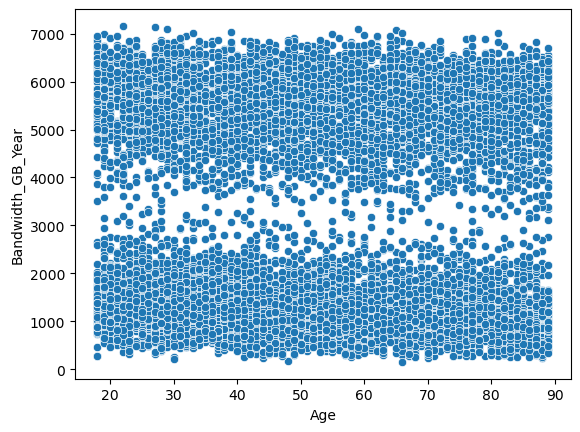

In [44]:
#Bivariate distribution of Age and Bandwidth_GB_Year
sns.scatterplot(x="Age", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Income - independent Variable')

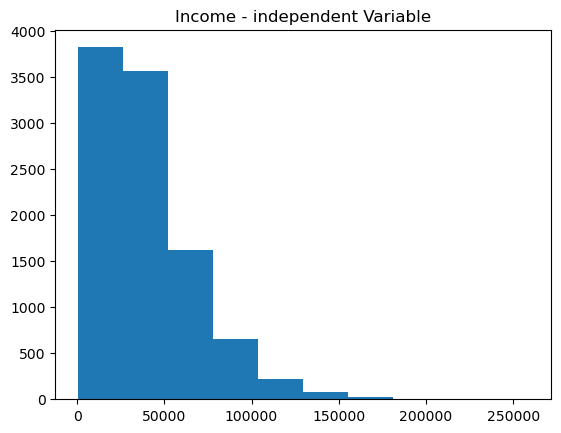

In [45]:
#Univariate distribution of dependent variable, Income
plt.hist(df_churn['Income'])
plt.title('Income - independent Variable')

<Axes: xlabel='Income', ylabel='Bandwidth_GB_Year'>

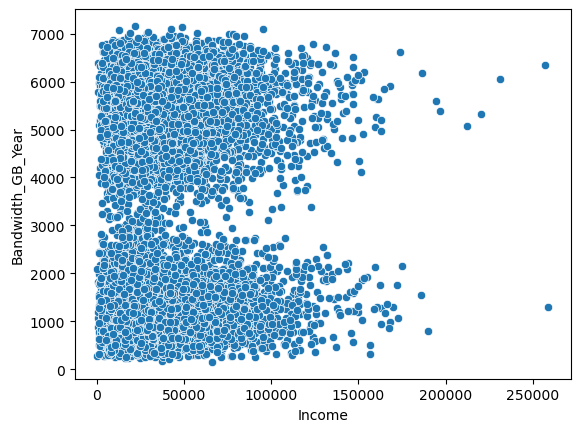

In [46]:
#Bivariate distribution of Income and Bandwidth_GB_Year
sns.scatterplot(x="Income", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Outage_sec_perweek - independent Variable')

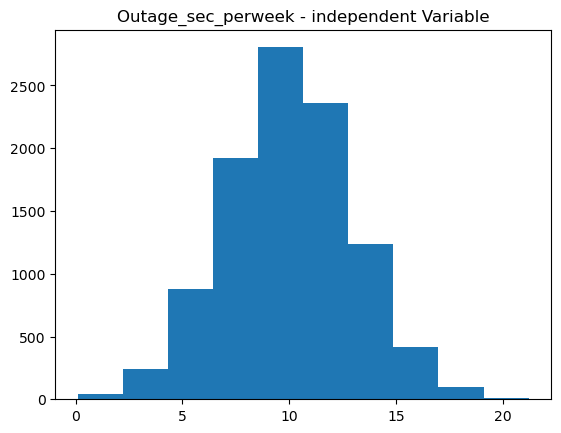

In [47]:
#Univariate distribution of dependent variable, Outage_sec_perweek
plt.hist(df_churn['Outage_sec_perweek'])
plt.title('Outage_sec_perweek - independent Variable')

<Axes: xlabel='Outage_sec_perweek', ylabel='Bandwidth_GB_Year'>

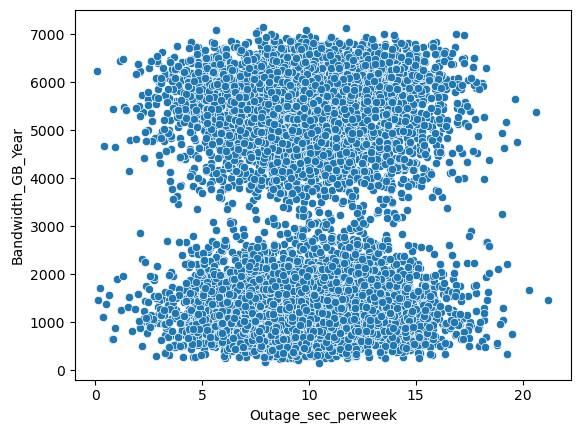

In [48]:
#Bivariate distribution of Outage_sec_perweek and Bandwidth_GB_Year
sns.scatterplot(x="Outage_sec_perweek", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Tenure - independent Variable')

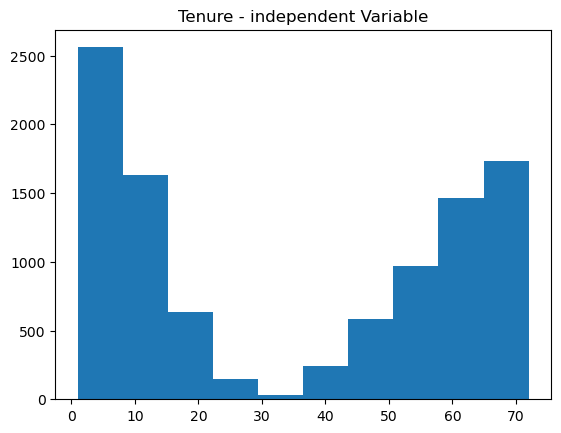

In [49]:
#Univariate distribution of dependent variable, Tenure
plt.hist(df_churn['Tenure'])
plt.title('Tenure - independent Variable')

<Axes: xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

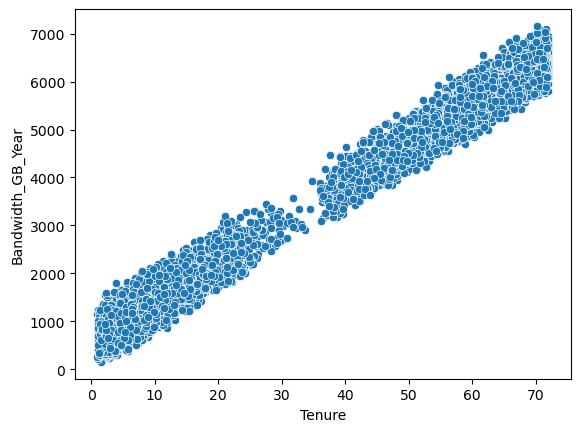

In [50]:
#Bivariate distribution of Tenure and Bandwidth_GB_Year
sns.scatterplot(x="Tenure", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'MonthlyCharge - independent Variable')

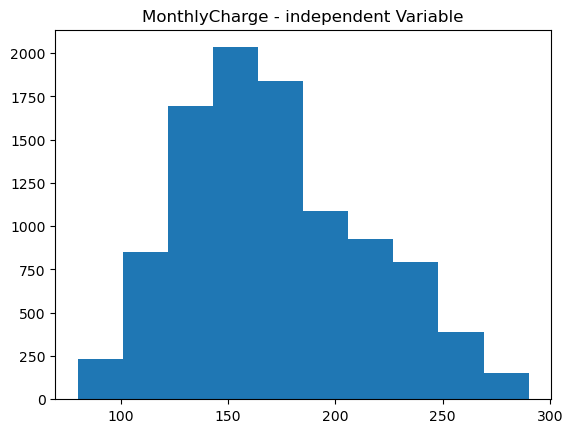

In [51]:
#Univariate distribution of dependent variable, MonthlyCharge
plt.hist(df_churn['MonthlyCharge'])
plt.title('MonthlyCharge - independent Variable')

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

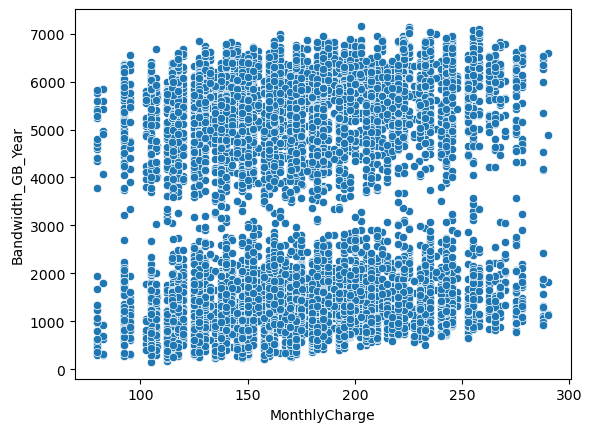

In [52]:
#Bivariate distribution of MonthlyCharge and Bandwidth_GB_Year
sns.scatterplot(x="MonthlyCharge", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Area - independent Variable')

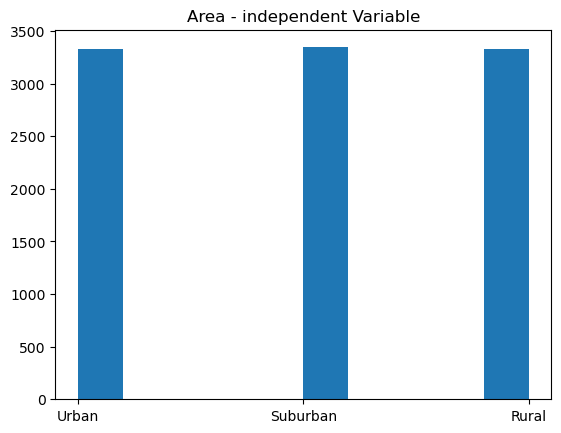

In [53]:
#Univariate distribution of dependent variable, Area
plt.hist(df_churn['Area'])
plt.title('Area - independent Variable')

<Axes: xlabel='Area', ylabel='Bandwidth_GB_Year'>

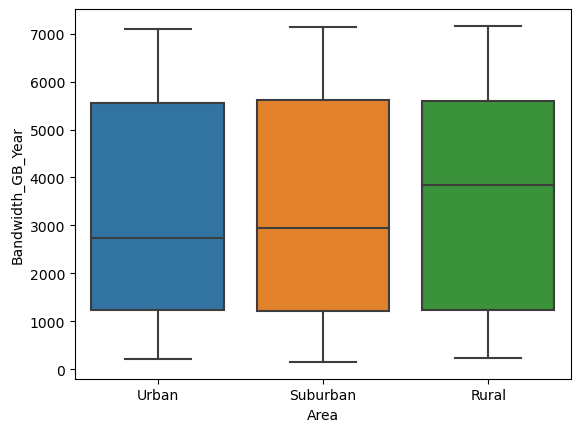

In [54]:
#Bivariate distribution of Area and Bandwidth_GB_Year
sns.boxplot(x="Area", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Contract - independent Variable')

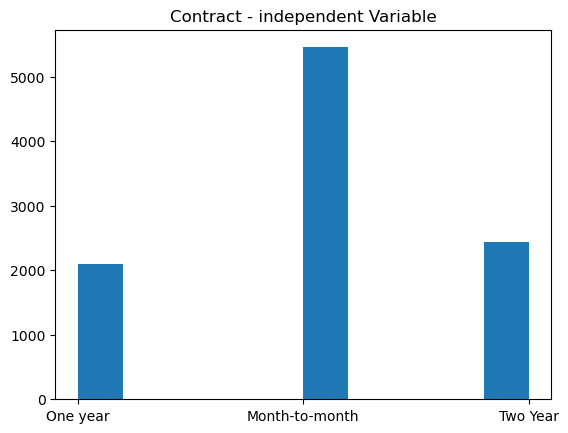

In [55]:
#Univariate distribution of dependent variable, Tenure
plt.hist(df_churn['Contract'])
plt.title('Contract - independent Variable')

<Axes: xlabel='Contract', ylabel='Bandwidth_GB_Year'>

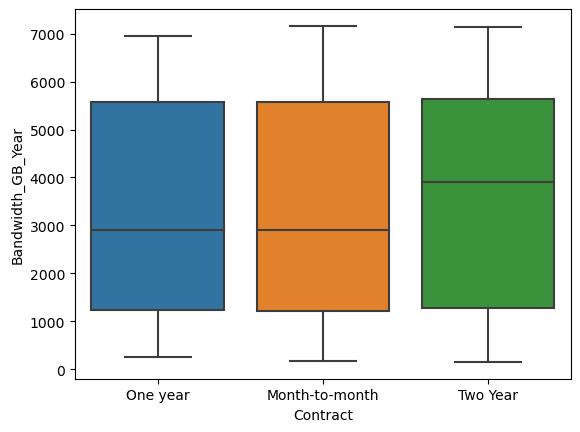

In [56]:
#Bivariate distribution of Contract and Bandwidth_GB_Year
sns.boxplot(x="Contract", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'Port_modem - independent Variable')

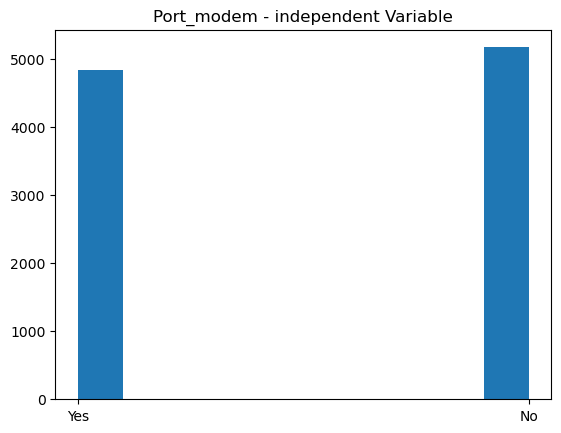

In [57]:
#Univariate distribution of dependent variable, Port_modem
plt.hist(df_churn['Port_modem'])
plt.title('Port_modem - independent Variable')

<Axes: xlabel='Port_modem', ylabel='Bandwidth_GB_Year'>

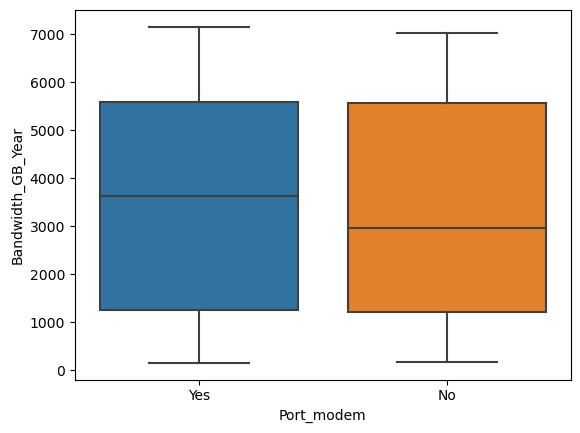

In [58]:
#Bivariate distribution of Port_modem and Bandwidth_GB_Year
sns.boxplot(x="Port_modem", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'OnlineBackup - independent Variable')

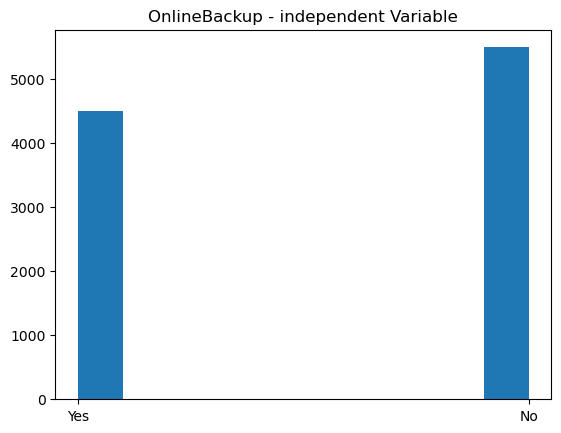

In [59]:
#Univariate distribution of dependent variable, OnlineBackup
plt.hist(df_churn['OnlineBackup'])
plt.title('OnlineBackup - independent Variable')

<Axes: xlabel='OnlineBackup', ylabel='Bandwidth_GB_Year'>

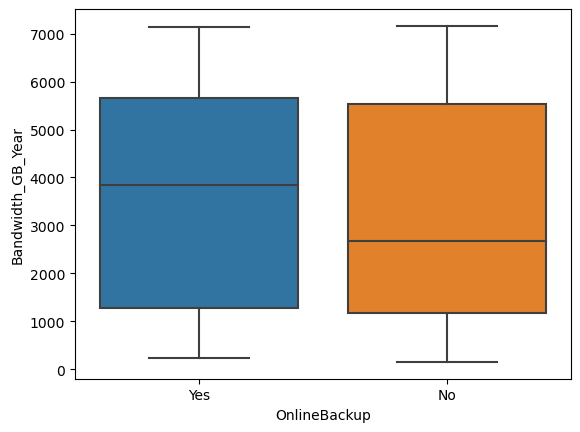

In [60]:
#Bivariate distribution of OnlineBackup and Bandwidth_GB_Year
sns.boxplot(x="OnlineBackup", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'StreamingTV - Independent Variable')

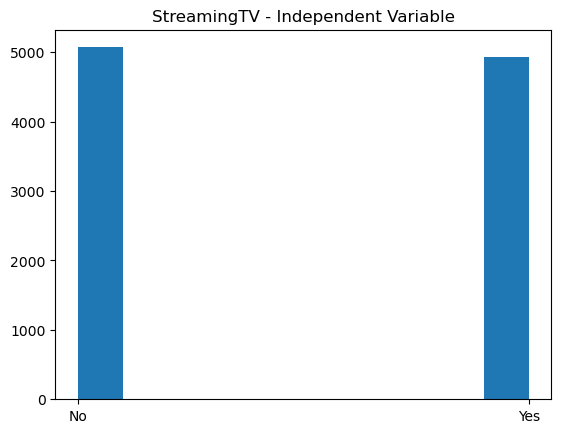

In [61]:
#Univariate distribution of dependent variable, StreamingTV
plt.hist(df_churn['StreamingTV'])
plt.title('StreamingTV - Independent Variable')

<Axes: xlabel='StreamingTV', ylabel='Bandwidth_GB_Year'>

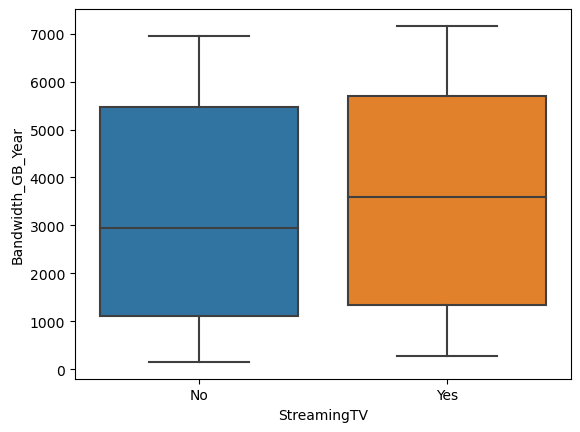

In [62]:
#Bivariate distribution of StreamingTV and Bandwidth_GB_Year
sns.boxplot(x="StreamingTV", y="Bandwidth_GB_Year", data=df_churn)

Text(0.5, 1.0, 'StreamingMovies - Independent Variable')

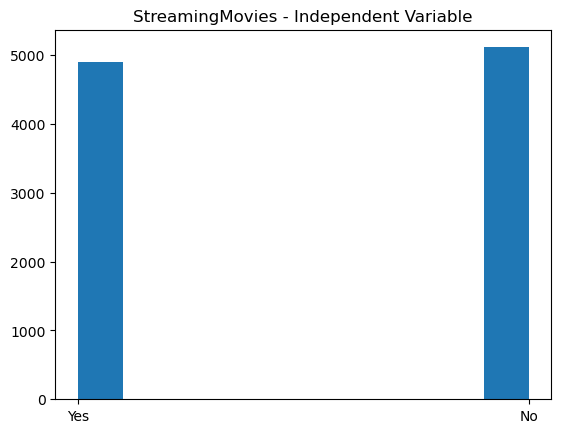

In [63]:
#Univariate distribution of dependent variable, StreamingMovies
plt.hist(df_churn['StreamingMovies'])
plt.title('StreamingMovies - Independent Variable')

<Axes: xlabel='StreamingMovies', ylabel='Bandwidth_GB_Year'>

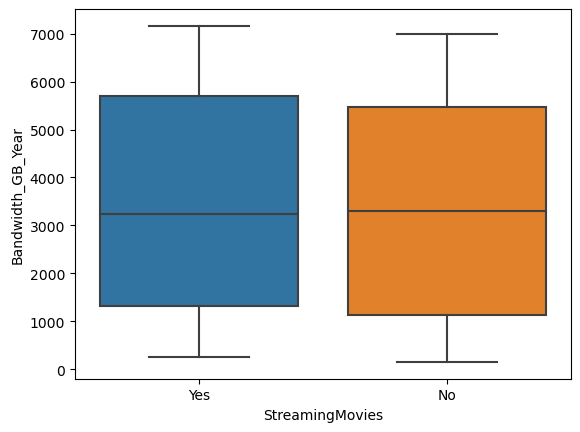

In [64]:
#Bivariate distribution of StreamingMovies and Bandwidth_GB_Year
sns.boxplot(x="StreamingMovies", y="Bandwidth_GB_Year", data=df_churn)

## C4. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step after cleaning the data is to transform it.  The goal of this process is to re-express categorical variables numerically so that they can be used in a linear regression model.  This regression will allow us to analyze the relationship between the independent variables and the dependent variable "Bandwidth_GB_Year".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I re-expressed the "Area" variable using one-hot encoding.  I chose this method because the values "Rural", "Suburban", and "Urban" represent labels that do not belong in particular order.  To do this, I used the "get_dummies()" method from the pandas library.  This generated a new dataframe containing the dummy variables "dummy_Rural", "dummy_Suburban", and "dummy_Urban".  Because the possible values of the resulting dataframe are "True" and "False" I used the "astype" method to convert them to 1 and 0.  This was done to make the values compatible with the linear regression model I planned to develop later on.  Before adding the dummy variables to "df_churn", I chose to exclude "dummy_Rural", which will serve as the base category for "Area".  It is recommended to exclude one of the dummy variables to avoid redundancy (Shmueli, 2015).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I also re-expressed "Contract" using one-hot encoding.  This was done because the values "Month-to-month", "One year", and "Two Year"represent labels rather than a particular order.  I generated dummy variables using the "get_dummies()" method, changed the data type of each dummy variable to float, and used "dummy_Month-to-month" as the base category to exclude.  The dummy variables "dummy_One year" and "dummy_Two Year" were then joined to "df_churn".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I decided to re-express the remaining categorical variables ("Port_modem", "OnlineBackup", "StreamingTV", and "StreamingMovies") by replacing "Yes" and "No" values with 1 and 0.  To do this, I created a unique dictionary for each variable.  Each unique dictionary assigns a value of 1 to "Yes" and 0 to "No".  I then used the pandas "replace()" method on each of the remaining variable and passed a unique dictionary as a parameter.  To confirm that the values had been changed, I printed the unique values for each of the variable.  The resulting output for each variable showed 1 and 0 rather than the original "Yes" and "No".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the data has been cleaned and transformed, we can proceed to building the initial linear regression model.

In [66]:
#Re-express Area as numeric using one-hot encoding

#Use pd.get_dummies to turn Area variable into 3 dummy variables
df_area = pd.get_dummies(df_churn["Area"], prefix="dummy")

#Change data type of dummy variables from boolean to float
df_area = df_area.astype(float)

#Join dummy_Suburban and dummy_Urban to df_churn.  Use dummy_Rural as base.
df_churn = df_churn.join(df_area[["dummy_Suburban","dummy_Urban"]])

In [67]:
#Re-express Contract as numeric using one-hot encoding

#Use pd.get_dummies to turn Area variable into 3 dummy variables
df_contract = pd.get_dummies(df_churn["Contract"], prefix="dummy")

#Change data type of dummy variables from boolean to float
df_contract = df_contract.astype(float)

#Join dummy_One year and dummy_Two Year to df_churn.  Use dummy_Month-to-month as base.
df_churn = df_churn.join(df_contract[["dummy_One year","dummy_Two Year"]])

In [68]:
#Re-express Port_modem as numeric 

#Find unique values of  variable
print(df_churn["Port_modem"].unique())

#Create dictionary to store numeric values for variable
dict_modem = {"Port_modem":
                    {"Yes":1,
                     "No": 0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_modem, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["Port_modem"] = df_churn["Port_modem"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["Port_modem"].unique())

['Yes' 'No']
[1. 0.]


In [69]:
#Re-express OnlineBackup as numeric 

#Find unique values of  variable
print(df_churn["OnlineBackup"].unique())

#Create dictionary to store numeric values for variable
dict_backup = {"OnlineBackup":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_backup, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["OnlineBackup"] = df_churn["OnlineBackup"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["OnlineBackup"].unique())

['Yes' 'No']
[1. 0.]


In [70]:
#Re-express StreamingTV as numeric 

#Find unique values of  variable
print(df_churn["StreamingTV"].unique())

#Create dictionary to store numeric values for variable
dict_streamingtv = {"StreamingTV":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_streamingtv, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["StreamingTV"] = df_churn["StreamingTV"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["StreamingTV"].unique())

['No' 'Yes']
[0. 1.]


In [71]:
#Re-express StreamingMovies as numeric 

#Find unique values of  variable
print(df_churn["StreamingMovies"].unique())

#Create dictionary to store numeric values for variable
dict_movies = {"StreamingMovies":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_movies, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["StreamingMovies"] = df_churn["StreamingMovies"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["StreamingMovies"].unique())

['Yes' 'No']
[1. 0.]


## C5. 

Please see the attached csv file containing the cleaned and transformed data.

In [73]:
df_churn.to_csv('churn_prepared.csv')

## D1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To create my initial multiple linear regression model, I first assigned the dependent and independent variables to separate dataframes, called "y" and "X", respectively.  These variables were previously identified in section C2.  I then added a constant by using the "sm.add_constant()" method to add a constant.  To run the model, I used the "OLS()" method from the statsmodels.api library and passed "y" and "X" as the parameters.  I also used the "fit()" method to fit the model.  The output was assigned to "mdl_initial".  To see the results of the regression, I used the "summary()" method on "mdl_initial" and printed the results.  Please see the output of the initial of regression model below.

In [75]:
#Build initial linear regression model [In-text citation: (LaRose et al, 2019)]

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure","MonthlyCharge"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_initial = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_initial.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.983e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:15   Log-Likelihood:                -67771.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9984   BIC:                         1.357e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                342.1945     15

## D2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the initial model has been built, I plan to select features by checking for multicollinearity in my independent variables and then using backwards stepwise regression.  Feature selection is imperative because having too many explanatory variables can make a regression model unreliable.  This will help us to identify which factors are indeed the most responsible in predicting customer bandwidth usage (Bandwidth_GB_Year).  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first method I will use is to check for multicollinearity. This occurs when there is a high degree of correlation between two or more independent variables.  This poses a problem because it can lead to inaccurate regression coefficients.  According to the summary of the initial model, there is a possibility that multicollinearity is present within my independent variables. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To treat this issue, I will calculate the variance inflation factor (VIF) for all of the features in my initial model.  The first step will be to assign the features to a dataframe, "X", and use the "variance_inflation_factor()" method to calculate the VIF for each feature.  Typically, if a predictor has a VIF of 10 or greater, there is a high level of correlation with another predictor (LaRose et al, 2019).  I will remove the variable with the highest VIF greater than 10 and recalculate VIF for the remaining variables.  This process will be repeated until there are no remaining variable with a VIF greater than 10. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After removing variables with high VIF, I will use backward stepwise regression to eliminate variables that are not statistically significant.  I will begin by removing the variable with the largest p-value that is greater than .05.  Then I will run a new iteration of the model using the "OLS()" method and recalculate the p-values for each variable.  This process will be repeated until the remaining independent variables have a p-value less than 0.05 and can be considered statistically significant.  These variables will be included in the reduced regression model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, I will compare the adjusted R-squared value of both models.  The adjusted R-squared measures the amount of variation in the dependent that is explained by the independent variables.  Unlike a normal R-squared value, it does not increase with the inclusion of more independent variables.  A highter adjusted R-squared value indicates that the model is a good fit for the data (Muralidhar, 2023).

## D3.  

Please see the annotated model evaluation process below.  This process follows the steps outlined in section D2.  Please see the output of each model iteration below.  The reduced linear regression model is located at the end of this section.

In [80]:
# Calculate VIF for all independent variables in the initial model

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure","MonthlyCharge"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

               feature        VIF
0           Population   1.446931
1       dummy_Suburban   1.950691
2          dummy_Urban   1.946850
3             Children   1.905455
4                  Age   6.660254
5               Income   2.874223
6       dummy_One year   1.375000
7       dummy_Two Year   1.439851
8           Port_modem   1.903563
9   Outage_sec_perweek   9.759777
10        OnlineBackup   2.152764
11         StreamingTV   3.085446
12     StreamingMovies   3.584116
13              Tenure   2.620867
14       MonthlyCharge  30.663539


In [82]:
# Remove MonthlyCharge (VIF = 30.663539) and recalculate VIF for remaining features
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

               feature       VIF
0           Population  1.438758
1       dummy_Suburban  1.911255
2          dummy_Urban  1.901632
3             Children  1.882061
4                  Age  5.933914
5               Income  2.781405
6       dummy_One year  1.362977
7       dummy_Two Year  1.427496
8           Port_modem  1.880992
9   Outage_sec_perweek  7.768865
10        OnlineBackup  1.775575
11         StreamingTV  1.912008
12     StreamingMovies  1.905778
13              Tenure  2.571060


In [84]:
#Remove MonthlyCharge from initial model and perform new regression to check for features with largest p-value greater than 0.05

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.451e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9985   BIC:                         1.357e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                406.6627     11

In [86]:
#Continue iterating on model, remove Port_modem (p = .731) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_initial = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_initial.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.025e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9986   BIC:                         1.357e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                405.9764     11

In [88]:
#Continue iterating on model, remove Outage_sec_perweek(p = .675) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.694e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9987   BIC:                         1.357e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             402.9893      9.086     

In [90]:
#Continue iterating on model, remove Population (p = .575) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.486e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9988   BIC:                         1.357e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             403.7859      8.973     

In [92]:
#Continue iterating on model, remove dummy_Urban (p = .547) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["dummy_Suburban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9989   BIC:                         1.357e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             405.3515      8.589     

In [94]:
#Continue iterating on model, remove dummy_Suburban (p = .656) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.160e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9990   BIC:                         1.357e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             406.0201      8.456     

In [96]:
#Continue iterating on model, remove dummy_One year (p = .387) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.304e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67793.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9991   BIC:                         1.357e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             407.3065      8.324     

In [98]:
#Continue iterating on model, remove dummy_Two Year (p = .403) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.491e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67793.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9992   BIC:                         1.357e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             408.3024      8.239     

#### Reduced Model

In [100]:
#Continue iterating on model, remove Income (p = .109) and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_reduced = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.739e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -67794.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9993   BIC:                         1.357e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             413.1511      7.665     

## E1.  Model Comparison

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After checking the variance inflation factor and p-value of each variable, I was able to iterate on my initial model several times until I was left with a complete reduced model.  The VIF calculations indicated that only one variable, "MonthlyCharge", needed to be removed due to high correlation with other predictors.  Additionally, I was left with only statistically significant variables because I eliminated all independent variables with p-values greater than 0.05.  The final model contains 6 independent variables from the 15 (including dummy variables) in the initial model.  These variables are "Children", "Age", "OnlineBackup", "StreamingTV", "StreamingMovies", and "Tenure".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To compare these two models, I decided to review their adjusted R-squared values.  This metric tells us how much variation in the dependent variable can be explained by the independent variables.  Unlike a normal R-squared value, it does not increase with the addition of independent variables.  From the results of sections D1 and D3, it appears that both models have an adjusted R-squared value of .991.  This means that despite the significant decrease in features, both models are equally good at explaining the amount of variation in "Bandwidth_GB_Year".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, there does not appear to be a significant difference in the residual standard error (rse) between the two models.  A smaller rse indicates a better fit of the estimate to the actual data (Kenton, 2020).  As we can see from the output in E2, the initial model has an rse of 212.51 while the reduced model has an rse of 212.90. Thus, can interpret this to mean that the initial model is marginally more accurate than the reduced model.  



## E2.  Output and Calculations

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Below are the output and calculations of the regression analysis, a residual plot, and the residual standard error.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To create a residual plot, I first calculated the value of the residuals by subtracting the predicted values of "Bandwidth_GB_Year" from the actual values of "Bandwidth_GB_Year".  The results were assigned to a variable named "residuals".  I then used the "sns.scatterplot" method to plot the residuals on the y-axis and the predicted values of "Bandwidth_GB_Year" on the x-axis.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I also decided to generate a histogram of the residuals using the "plt.hist()" function.  This was done to check the assumption of normality of residuals.  From the output, we can see that the distribution of residuals is not normal.  This violates one of the key assumptions outlined in B2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To obtain the residual standard error, I used the "mse_resid()" method on the initial and reduced linear regression models and calculated the square root. The residual standard error for the reduced model is 212.90385030731335.

### Initial Model

In [104]:
#Build initial linear regression model [In-text citation: (LaRose et al, 2019)]

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure","MonthlyCharge"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_initial = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_initial.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.983e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67771.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9984   BIC:                         1.357e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                342.1945     15

### Model Reduction using Variance Inflation Factor

In [106]:
#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure","MonthlyCharge"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

               feature        VIF
0           Population   1.446931
1       dummy_Suburban   1.950691
2          dummy_Urban   1.946850
3             Children   1.905455
4                  Age   6.660254
5               Income   2.874223
6       dummy_One year   1.375000
7       dummy_Two Year   1.439851
8           Port_modem   1.903563
9   Outage_sec_perweek   9.759777
10        OnlineBackup   2.152764
11         StreamingTV   3.085446
12     StreamingMovies   3.584116
13              Tenure   2.620867
14       MonthlyCharge  30.663539


In [107]:
#Remove MonthlyCharge (VIF = 30.663539)
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

               feature       VIF
0           Population  1.438758
1       dummy_Suburban  1.911255
2          dummy_Urban  1.901632
3             Children  1.882061
4                  Age  5.933914
5               Income  2.781405
6       dummy_One year  1.362977
7       dummy_Two Year  1.427496
8           Port_modem  1.880992
9   Outage_sec_perweek  7.768865
10        OnlineBackup  1.775575
11         StreamingTV  1.912008
12     StreamingMovies  1.905778
13              Tenure  2.571060


### Model Reduction using Backwards Stepwise Regression

In [108]:
#Iterate on initial model, remove MonthlyCharge and check p-values

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.451e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9985   BIC:                         1.357e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                406.6627     11

In [109]:
#Continue iterating on model, remove Port_modem and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.025e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9986   BIC:                         1.357e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                405.9764     11

In [110]:
#Continue iterating on model, remove Outage_sec_perweek and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.694e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9987   BIC:                         1.357e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             402.9893      9.086     

In [111]:
#Continue iterating on model, remove Population and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.486e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9988   BIC:                         1.357e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             403.7859      8.973     

In [112]:
#Continue iterating on model, remove dummy_Urban and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["dummy_Suburban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9989   BIC:                         1.357e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             405.3515      8.589     

In [113]:
#Continue iterating on model, remove dummy_Suburban and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.160e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9990   BIC:                         1.357e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             406.0201      8.456     

In [114]:
#Continue iterating on model, remove dummy_One year and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.304e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67793.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9991   BIC:                         1.357e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             407.3065      8.324     

In [115]:
#Continue iterating on model, remove dummy_Two Year and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.491e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67793.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9992   BIC:                         1.357e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             408.3024      8.239     

### Reduced Model

In [117]:
#Continue iterating on model, remove Income and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_reduced = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.739e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:                -67794.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9993   BIC:                         1.357e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             413.1511      7.665     

### Calculation of Residual Values

In [119]:
#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant
X = sm.add_constant(X)

#Generate predictions using sklearn.predict().  
Predicted_Bandwidth_GB_Year = mdl_reduced.predict(X)

#Calculate and print residuals
residuals = df_churn["Bandwidth_GB_Year"] - Predicted_Bandwidth_GB_Year
print(residuals)

0      -149.843210
1       -92.843021
2       179.721248
3       248.075866
4      -235.684753
           ...    
9995    398.540805
9996     -8.961244
9997   -106.982030
9998   -117.840687
9999      5.729408
Length: 10000, dtype: float64


### Residual Scatterplot 

Text(0, 0.5, 'Residuals')

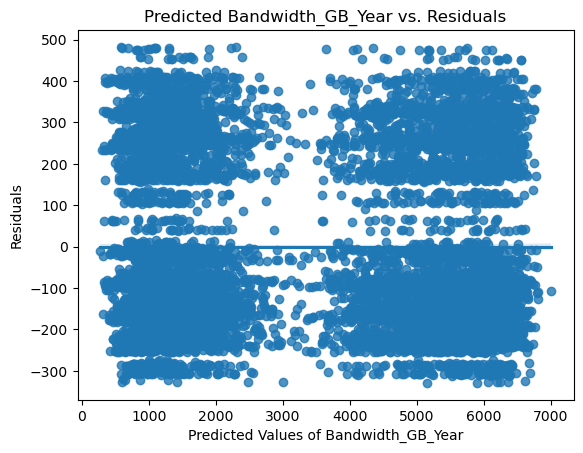

In [121]:
sns.regplot(y=residuals, x=Predicted_Bandwidth_GB_Year)
plt.title("Predicted Bandwidth_GB_Year vs. Residuals")
plt.xlabel("Predicted Values of Bandwidth_GB_Year")
plt.ylabel("Residuals")

#### Distribution of Residuals

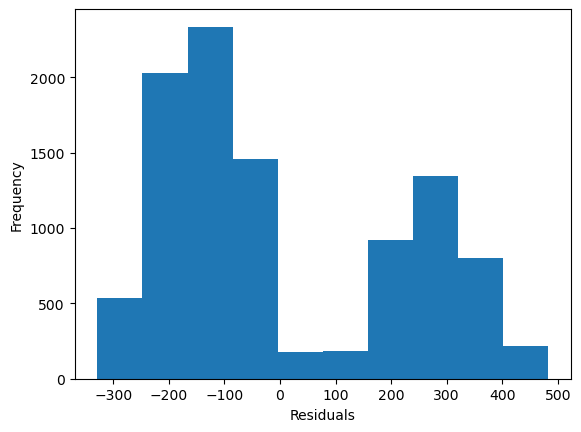

In [123]:
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Residual Standard Error

In [125]:
#Calculate mean squared error of initial model
mse_initial = mdl_initial.mse_resid

#Calculate residual standard error using mse
rse_initial = np.sqrt(mse_initial)
print("Initial Model Residual Standard Error: " + str(rse_initial))

#Calculate mean squared error of initial model
mse_reduced = mdl_reduced.mse_resid

#Calculate residual standard error using mse
rse_reduced = np.sqrt(mse_reduced)
print("Reduced Model Residual Standard Error: " + str(rse_reduced))


Initial Model Residual Standard Error: 212.50656370414023
Reduced Model Residual Standard Error: 212.90385030731335


## E3.  Code

Please see the attached code used to implement the linear regression model.  The file name is "E3.ipynb".

## F1.

Now that we have arrived at a reduced regression model, we can analyze the results and discuss key insights.

#### Regression Equation

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The regression equation below demonstrates the relationship between the independent variables ("Children", "Age", "OnlineBackup", "StreamingTV", "StreamingMovies", and "Tenure") and the dependent variable, "Bandwidth_GB_Year.

<em>Bandwidth_GB_Year = 413.1511 + (30.4486 * Children) - (3.2970 * Age) + (94.7634 * OnlineBackup) + (230.7298 * StreamingTV) + (213.7166 * StreamingMovies) + (81.9577 * Tenure)<em>
    
#### Interpretation of Coefficients
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the results of the reduced linear regression model, we can see that the intercept of the equation is 413.1511. This represents the value of Bandwidth_GB_Year when all independent variables have a value of zero (Frost, 2022). The coefficients, on the other hand, represent the amount by which "Bandwidth_GB_Year" will change if there is an increase of one unit of a given variable. To summarize, this is how an increase in one unit of each independent variable would affect the dependent variable.
    
<ul> Keeping all things constant:
    <li>An increase of one unit of "Children" is associated with 30.4486 unit increase in "Bandwidth_GB_Year"</li>
    <li>An increase of one unit of "Age" is associated with a 3.2970 unit increase in "Bandwidth_GB_Year" by 3.2970</li>
    <li>An increase of one unit of "OnlineBackup" is associated with a 94.7634 unit increase in  "Bandwidth_GB_Year"</li>
    <li>An increase of one unit of "StreamingTV" is associated with a 230.7298 unit increase in "Bandwidth_GB_Year"</li>
    <li>An increase of one unit of "StreamingMovies" is associated with a 213.7166 unit increase in "Bandwidth_GB_Year"</li>
    <li>An increase of one unit of "Tenure" is associated with a 81.9577 unit increase in "Bandwidth_GB_Year"</li>
</ul>

#### Statistical and Practical significance

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One of the ways we can assess the statistical significance of the model is to look at the p-values of the variables.  From the reduced multiple linear regression in D3, we can see that all variables have a p-value less than 0.05.  We can interpret this to mean that all of the variables are statistically significant(Singh, 2020).  The Prob(F-statistic) metric similarly allows us to evaluate the statistical significance of the model as a whole.  Because this value is also less than 0.05, we can interpret this to mean that the regression model itself is statistically significant.  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Despite appearing statistically significant based on the metrics discussed, this model is not practically significant.  The main issue with the model is that the data is not suitable for linear regression.  The model violates a few of the assumptions that we will discuss momentarily.  It is possible that these violations influenced the metrics we used to come to the conclusion that the model is statistically significant.  It is questionable that this model would provide accurate predictions in the real world.  
    
#### Limitations

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are a few limitations that come with multiple linear regression and the model I developed.  Although linear regression as technique is useful, it relies several assumptions that were mentioned previously.  These assumptions are the linear relationship between the dependent and independent variables, independence of residuals, homoscedasticity, and normality of the residuals.  The only variable in the final model that showed a linear relationship with "Bandwidth_GB_Year" was "Tenure".  This violates the linear relationship assumption.  We also know that the assumption regarding the normality of residuals has been violated based on the histogram presented in E2.  Based on the knowledge of these violations, it is possible that the results of the reduced regression model are unreliable.

The data cleaning methods used might have also had a negative impact on the model.  By treating the 2,129 missing values in "InternetService" with modal imputation, I likely skewed the data which could have some repercussions.  Additionally, my decision to retain the outliers in the data could cause it to lose accuracy.  

Lastly, the methods I chose to reduce the model may have had a negative effect on its ability to make accurate predictions.  In the initial model, I started off with 15 variables (12 independent variables plus 3 dummy variables). After using VIF to eliminate multicollinearity and removing variables with p-values greater than 0.05, I was left with 6 variables in the final model.  It is possible that I removed too many variables with this strategy, which means the model might be too simple to make very accurate predictions. 

## F2.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the company has developed a model, the next logical step is to apply the insights learned.  As mentioned previously, there are some limitations to linear regression that could cause unreliable predictions.  Despite having an adjusted R-squared value of .991, the final model relies on data that does not adhere to the assumptions of linear regression.  The lack of normality in the residuals violates a key assumption and may cause the model to be inaccurate.  Additionally, most of the independent variables used do not have a linear relationship with "Bandwidth_GB_Year".  Because of this, the company should consider using a different type of analysis that does not have the limitations of linear regression.  

## G. 

Please see the link for the panopto recording below. 

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c889faa3-2515-464f-b1b5-b10b01750986

## H.  Web Sources

Detecting Multicollinearity with VIF – Python. (n.d.). GeeksforGeeks. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

## I.  Sources

Lee, P., Trimmel, D., Hallside, E. (2023). No bump to bitrates for digital apps in the near term: Is a period of enough fixed broadband connectivity approaching?. Deloitte. https://www2.deloitte.com/us/en/insights/industry/technology/technology-media-and-telecom-predictions/2024/bandwidth-demand-forecast.html

The Four Assumptions of Linear Regression (2020, January 8). Statology. https://www.statology.org/linear-regression-assumptions/

R vs Python for Data Science: Which One Is the Best Programming Language for Data Scientists in 2024? (n.d.). Turing. https://www.turing.com/kb/best-programming-language-for-data-science-r-vs-python

Walwadkar, D. (2022, April 26). Regression A to Z : Choosing the Correct Type of Regression Analysis. Medium. https://medium.com/@dnyaneshwalwadkar/regression-a-to-z-choosing-the-correct-type-of-regression-analysis-4cfb29ae5a1

Shmueli, Galit. "Categorical predictors: how many dummies to use in regression vs. k-nearest neighbors." BzST | Business Analytics, Statistics, Teaching, 19 Aug. 2015, www.bzst.com/2015/08/categorical-predictors-how-many-dummies.html.

Muralidhar, K. (2023, February 7). Demystifying R-Squared and Adjusted R-Squared. BuiltIn. https://builtin.com/data-science/adjusted-r-squared

Kenton, W. (2020, October 30). Residual Standard Deviation: Definition, Formula, and Examples. Investopedia. https://www.investopedia.com/terms/r/residual-standard-deviation.asp

Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

Frost, J. (2022, October 29). Linear Regression Equation Explained. Statistics by Jim. https://statisticsbyjim.com/regression/linear-regression-equation/

Singh, A. (2020, March 4). Understanding the P-Value in Regression. Medium. https://medium.com/analytics-vidhya/understanding-the-p-value-in-regression-1fc2cd2568af#:~:text=The%20P%2DValue%20as%20you,observed%20in%20the%20sample%20also